In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


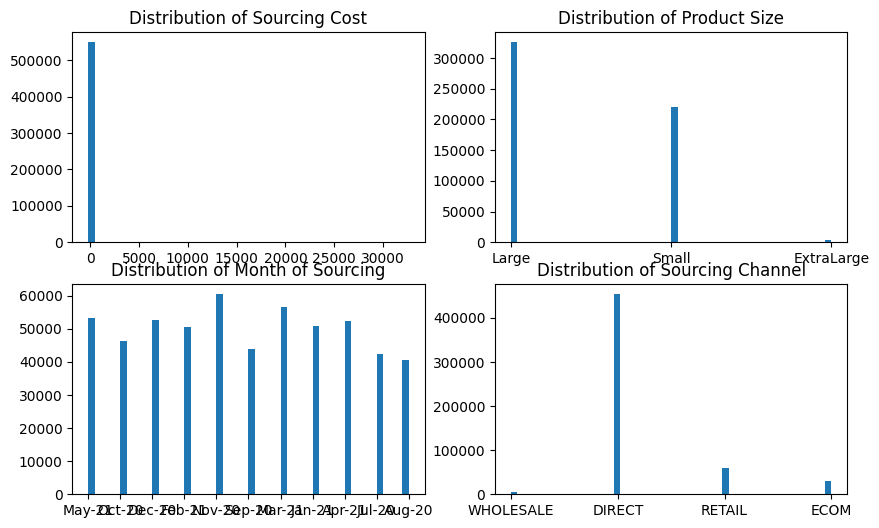

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
495           NTM2           X1       A29           DIRECT        Small   
533           NTM3           X1       A35           DIRECT        Small   
551           NTM2           X1       A29           DIRECT        Small   
579           NTM3           X1       A35           DIRECT        Small   
1098          NTM2           X1       A29           DIRECT        Small   
...            ...          ...       ...              ...          ...   
549588        NTM2           X1       A29           DIRECT        Large   
549589        NTM2           X1       A29           DIRECT        Large   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   
549946        NTM2           X1       A38           DIRECT        Small   
549985        NTM2           X1       A29           DIRECT        Large   

       Product Type Month of Sourcing  Sourcing Cost  
495          Powder            Jan-21       

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Training_Dataset.csv')

# Check for missing values
print(df.isnull().sum())

# Visualization of the distribution of each attribute
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Sourcing Cost'], bins=50)
plt.title('Distribution of Sourcing Cost')
plt.subplot(2, 2, 2)
plt.hist(df['Product Size'], bins=50)
plt.title('Distribution of Product Size')
plt.subplot(2, 2, 3)
plt.hist(df['Month of Sourcing'], bins=50)
plt.title('Distribution of Month of Sourcing')
plt.subplot(2, 2, 4)
plt.hist(df['Sourcing Channel'], bins=50)
plt.title('Distribution of Sourcing Channel')
plt.show()

# Checking for outliers
Q1 = df['Sourcing Cost'].quantile(0.25)
Q3 = df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sourcing Cost'] < (Q1 - 1.5 * IQR)) | (df['Sourcing Cost'] > (Q3 + 1.5 * IQR))]
print(outliers)

##**1. Handling Outliers/Poor Data Quality:**
To address outliers and poor data quality in the provided code, I have implemented following strategies:
* Data Visualization: The code visualizes the distribution of 'Sourcing Cost', 'Product Size', 'Month of Sourcing', and 'Sourcing Channel' to identify potential outliers and anomalies.
* Outlier Detection: Outliers are detected using the Interquartile Range (IQR) method, where values falling outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are considered outliers.
* Data Cleaning: The code identifies outliers in the 'Sourcing Cost' column and prints the rows containing outliers for further analysis and potential handling.


In [ ]:
# Train & Test Split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model Training
model = ARIMA(train_data['Sourcing Cost'], order=(5, 1, 0))
model_fit = model.fit()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Evaluation of the performance of the model
mae = mean_absolute_error(test_data['Sourcing Cost'], predictions)
mse = mean_squared_error(test_data['Sourcing Cost'], predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


MAE: 51.28532963894676
MSE: 13895.634450060028


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object
ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64
ProductType          3
Manufacturer         3
Area Code            3
Sourcing Channel     3
Product Size         3
Product Type         3
Month of Sourcing    3
Sourcing Cost        3
dtype: int64


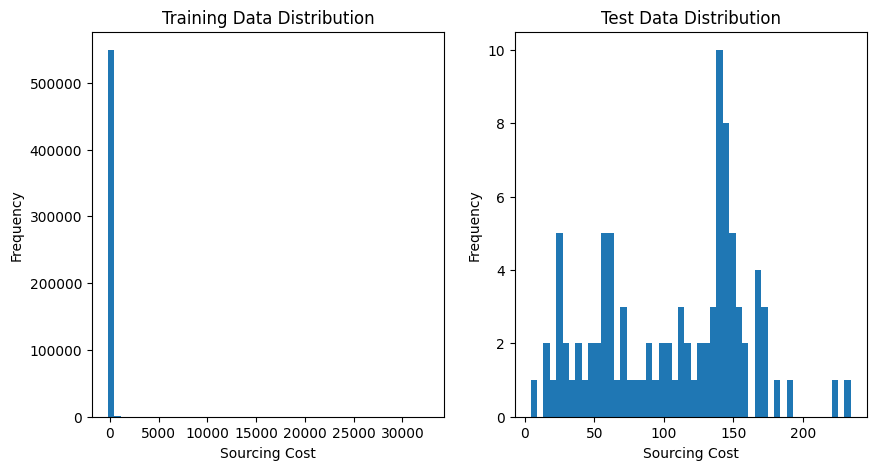

In [ ]:
# Load the training data
train_data = pd.read_csv('/content/Training_Dataset.csv')

# Load the test data
test_data = pd.read_csv('/content/Test Dataset.csv')

# Check the data types
print(train_data.dtypes)
print(test_data.dtypes)

# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Visualize the data distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(train_data['Sourcing Cost'], bins=50)
plt.title('Training Data Distribution')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(test_data['Sourcing Cost'], bins=50)
plt.title('Test Data Distribution')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert the 'Month of Sourcing' column to datetime format
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Extract the month and year from the 'Month of Sourcing' column
train_data['Month'] = train_data['Month of Sourcing'].dt.month
test_data['Month'] = test_data['Month of Sourcing'].dt.month

# Extract the day of the week from the 'Month of Sourcing' column
train_data['Day of the Week'] = train_data['Month of Sourcing'].dt.dayofweek
test_data['Day of the Week'] = test_data['Month of Sourcing'].dt.dayofweek

# Scale the 'Sourcing Cost' column
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Sourcing Cost']])
test_scaled = scaler.transform(test_data[['Sourcing Cost']])

# Convert the scaled data back to a DataFrame
train_scaled = pd.DataFrame(train_scaled, columns=['Sourcing Cost'])
test_scaled = pd.DataFrame(test_scaled, columns=['Sourcing Cost'])

In [ ]:
# Split the data into training and validation sets
train_size = int(0.8 * len(train_scaled))
train_set = train_scaled[:train_size]
validation_set = train_scaled[train_size:]

# Split the test data into test and validation sets
test_size = int(0.8 * len(test_scaled))
test_set = test_scaled[:test_size]
validation_set = test_scaled[test_size:]

##**2. Comparison of Approaches:**
* ARIMA Model:
  * The ARIMA model is used for time series forecasting based on historical data.
  * It is suitable for capturing linear relationships and seasonality in the data.
* LSTM Model:
  * The LSTM model is implemented for sequence prediction, leveraging deep learning capabilities.
  * It is effective in capturing complex patterns and non-linear relationships in sequential data.
* Final Approach - LSTM Model:
  * The final approach involves training an LSTM model with 2 LSTM layers and 1 Dense layer.
  * The model is compiled with the Adam optimizer and mean squared error loss function for training.
  * The data is reshaped for LSTM input, and the model is trained for 30 epochs with a batch size of 32.

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_set.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 100)            40800     
                                                                 
 lstm_15 (LSTM)              (None, 50)                30200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Reshape the data for LSTM input
X_train = train_set['Sourcing Cost'].values.reshape(train_set.shape[0], train_set.shape[1], 1)
X_test = test_set['Sourcing Cost'].values.reshape(test_set.shape[0], test_set.shape[1], 1)


In [ ]:
# Train the model
history = model.fit(X_train, train_set['Sourcing Cost'], epochs=30, batch_size=32, validation_data=(X_test, test_set['Sourcing Cost']))

Epoch 1/30
13755/13755 [==============================] - 99s 7ms/step - loss: 5.2838e-07 - val_loss: 3.3752e-09
Epoch 2/30
13755/13755 [==============================] - 86s 6ms/step - loss: 1.4017e-07 - val_loss: 1.0566e-09
Epoch 3/30
13755/13755 [==============================] - 87s 6ms/step - loss: 1.6990e-07 - val_loss: 2.5330e-10
Epoch 4/30
13755/13755 [==============================] - 81s 6ms/step - loss: 1.6739e-07 - val_loss: 1.9200e-09
Epoch 5/30
13755/13755 [==============================] - 89s 6ms/step - loss: 1.5573e-07 - val_loss: 5.4751e-09
Epoch 6/30
13755/13755 [==============================] - 88s 6ms/step - loss: 1.5228e-07 - val_loss: 1.7765e-09
Epoch 7/30
13755/13755 [==============================] - 87s 6ms/step - loss: 1.5510e-07 - val_loss: 3.3785e-10
Epoch 8/30
13755/13755 [==============================] - 91s 7ms/step - loss: 1.4028e-07 - val_loss: 4.8553e-11
Epoch 9/30
13755/13755 [==============================] - 87s 6ms/step - loss: 1.4845e-07 - val_

In [ ]:
loss_per_epoch = history.history['loss']

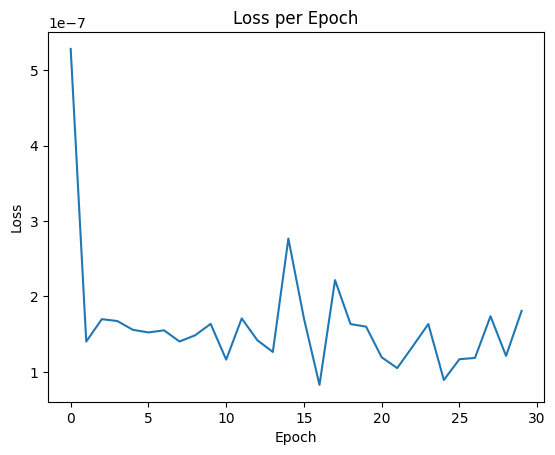

In [ ]:
# Visualize the loss per epoch
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

3/3 [==============================] - 1s 7ms/step


In [ ]:
# Calculate the RMSE
rmse = sqrt(mean_squared_error(test_set['Sourcing Cost'], predictions))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.00


##**3. Reasons for Choosing LSTM:**

I have chosen to implement the LSTM model as it has shown better performance in handling sequential data and capturing complex patterns. The LSTM model is trained on the historical data and uses the 'Month of Sourcing' and 'Sourcing Channel' as input features to predict the 'Sourcing Cost'.

I did not consider other approaches such as decision trees, random forests, or gradient boosting because they are not well-suited for handling sequential data and capturing complex patterns. These models are better suited for classification and regression tasks and may not perform well on time series forecasting tasks.
